# *k* Nearest Neighbour

### Use `NearestNeighbors` to identify neighbours.  
Athlete Selection Data  
First load dataset into a data frame.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
athlete = pd.read_csv('AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,0
x2,3.75,8.00,0
x3,2.25,5.50,0
x4,3.25,8.25,0
x5,2.75,7.50,0


In [2]:
names = athlete.index
names

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
      dtype='object', name='Athlete')

In [3]:
# Store features and labels in numpy arrays X and y
y = athlete.pop('Selected').values
X = athlete.values
X[0]

array([2.5, 6. ])

In [4]:
athlete

,Speed,Agility
Athlete,,
x1,2.50,6.00
x2,3.75,8.00
x3,2.25,5.50
x4,3.25,8.25
x5,2.75,7.50
x6,4.50,5.00
x7,3.50,5.25
x8,3.00,3.25
x9,4.00,4.00


In [5]:
athlete_neigh = NearestNeighbors(2, 0.4)
athlete_neigh.fit(athlete) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=0.4)

In [6]:
# Find x nearest neighbour for X4
x4 = [3.25,8.25]
athlete_neigh.kneighbors([x4], 2, return_distance=True)

(array([[0.        , 0.55901699]]), array([[3, 1]], dtype=int64))

In [7]:
# Find three nearest neighbours for q
q = [5.0,7.5]
q3n = athlete_neigh.kneighbors([q], 3)[1][0]
# q3n contains the 'index' of the nearest neighbours
for n in q3n:
    print(names[n])

x16
x15
x2


### Plot this dataset

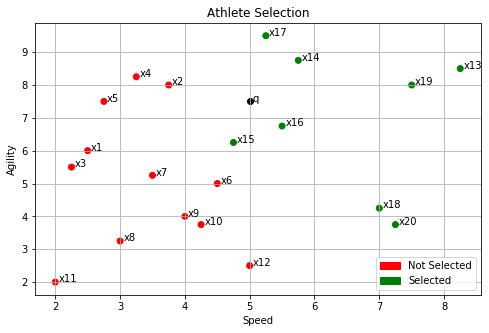

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 0 else 'green' for l in y]
x1 = X[:,0]
x2 = X[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q[0],q[1],color='black')
plt.annotate('q',(q[0]+0.05,q[1]))
plt.title("Athlete Selection")
plt.xlabel("Speed")
plt.ylabel("Agility")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

## Data Normalization
Features may be measured on very different scales.  
(Not really an issue here.)  
Rescale the data so that all features have the same scale, two options:
- N(0,1) rescale with zero mean and unit variance
- MinMax scaling - typically in the range (0,1)

### N(0,1)

In [10]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled

array([[0.22330171, 0.75770254]])

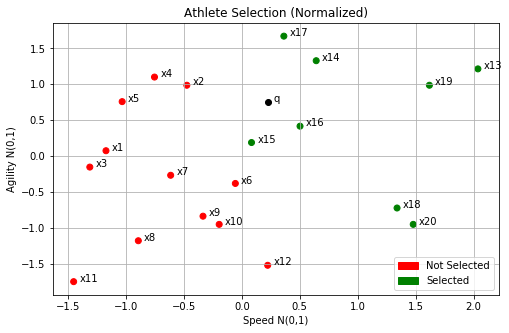

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 0 else 'green' for l in y]
x1 = X_scaled[:,0]
x2 = X_scaled[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q_scaled[0,0],q_scaled[0,1],color='black')
plt.annotate('q',(q_scaled[0,0]+0.05,q_scaled[0,1]))
plt.title("Athlete Selection (Normalized)")
plt.xlabel("Speed N(0,1)")
plt.ylabel("Agility N(0,1)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

## *k*-NN Classifier
### Forecast data

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn import preprocessing

train = pd.read_csv('Forecast.csv')
train.head(5)

,Temperature,Humidity,Wind_Speed,Go-Out
0,6,85,30,0
1,14,90,35,0
2,15,86,8,1
3,21,56,15,1
4,17,67,9,1


In [13]:
train.shape

(18, 4)

In [14]:
y = train.pop('Go-Out').values # y is a numpy array with the class labels

In [15]:
X = train.values.astype(float)  # X is a numpy array with the training data converted to floats

In [16]:
X

array([[ 6., 85., 30.],
       [14., 90., 35.],
       [15., 86.,  8.],
       [21., 56., 15.],
       [17., 67.,  9.],
       [ 9., 70., 16.],
       [13., 34., 11.],
       [17., 95., 32.],
       [14., 70., 11.],
       [17., 80., 28.],
       [15., 70.,  6.],
       [16., 90.,  7.],
       [22., 75., 19.],
       [16., 91., 28.],
       [14., 42.,  8.],
       [ 7., 95., 21.],
       [12., 15., 28.],
       [14., 70., 21.]])

In [17]:
X.shape

(18, 3)

In [18]:
# Default k-NN metric is Minkowski with p = 2, i.e. Euclidean
forecast_kNN = KNeighborsClassifier(n_neighbors=3) 
forecast_kNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
# Generate predictions (forecasts) for 2 query examples
xinput = np.array([[8.,70.,11.],
                   [8,69,15]])
forecast_kNN.predict(xinput)

array([1, 0], dtype=int64)

In [20]:
# Explicitly find the neighbours (and distances) for a query
q = [8,69,15]
forecast_kNN.kneighbors([q])

(array([[1.73205081, 7.28010989, 8.54400375]]),
 array([[ 5,  8, 17]], dtype=int64))

In [21]:
y_dash = forecast_kNN.predict(X) # Use training data as test
print('     y:',y)
print('y_dash:',y_dash)

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0]


In [22]:
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[ 7  1]
 [ 0 10]]


What would we expect to happen when k=1? (Try it.)

### Normalise data
The default for `preprocessing.scale` is to convert features to N(0,1)

In [23]:
X_scaled = preprocessing.scale(X)
forecast_kNN_S = KNeighborsClassifier(n_neighbors=3)
forecast_kNN_S.fit(X_scaled,y)
y_dash = forecast_kNN_S.predict(X_scaled)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 
print('\n     y:',y)
print('y_dash:',y_dash)

Confusion matrix:
[[6 2]
 [1 9]]

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1]


In this case scaling is actually making things worse.

In [24]:
X_scaled[:5] # First five rows of the scaled data.

array([[-2.08897768,  0.64102699,  1.21956865],
       [-0.09684002,  0.87272349,  1.7498159 ],
       [ 0.15217718,  0.68736629, -1.11351921],
       [ 1.64628042, -0.70281272, -0.37117307],
       [ 0.6502116 , -0.19308042, -1.00746976]])

In [25]:
forecast_kNN_S.kneighbors([q])
# What is wrong with this? 
# We haven't scaled the query.

(array([[69.62706959, 69.87454474, 69.91814329]]),
 array([[ 7,  1, 13]], dtype=int64))

In [26]:
# We need a 'handle' on the scaler so that we can reapply it to the query
scaler = preprocessing.StandardScaler().fit(X) #A scaler object
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled[0]

array([-1.59094327, -0.10040182, -0.37117307])

In [27]:
forecast_kNN_S.fit(X_scaled,y)
forecast_kNN_S.kneighbors(q_scaled)

(array([[0.27459677, 1.38509156, 1.55384542]]),
 array([[ 5, 15,  8]], dtype=int64))

### MinMax Scaling - range (0,1)

In [28]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_scaled01 = min_max_scaler.fit_transform(X)
X_scaled01

array([[0.        , 0.875     , 0.82758621],
       [0.5       , 0.9375    , 1.        ],
       [0.5625    , 0.8875    , 0.06896552],
       [0.9375    , 0.5125    , 0.31034483],
       [0.6875    , 0.65      , 0.10344828],
       [0.1875    , 0.6875    , 0.34482759],
       [0.4375    , 0.2375    , 0.17241379],
       [0.6875    , 1.        , 0.89655172],
       [0.5       , 0.6875    , 0.17241379],
       [0.6875    , 0.8125    , 0.75862069],
       [0.5625    , 0.6875    , 0.        ],
       [0.625     , 0.9375    , 0.03448276],
       [1.        , 0.75      , 0.44827586],
       [0.625     , 0.95      , 0.75862069],
       [0.5       , 0.3375    , 0.06896552],
       [0.0625    , 1.        , 0.51724138],
       [0.375     , 0.        , 0.75862069],
       [0.5       , 0.6875    , 0.51724138]])

## Instance weighting
Why should all neighbours have the same impact on the classification?  
Give nearer neighbours a larger vote.

In [29]:
forecast_kNN_SW = KNeighborsClassifier(n_neighbors=3,weights='distance')
forecast_kNN_SW.fit(X_scaled,y)
y_dash = forecast_kNN_SW.predict(X_scaled)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 
print('\n     y:',y)
print('y_dash:',y_dash)

Confusion matrix:
[[ 8  0]
 [ 0 10]]

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]


No errors now as nearest neighbour (itself) gets the largest vote. 